In [1]:
import os
import pickle
import argparse
import h5py
import torch
from model import NetG
from misc import get_logger, ges_Aonfig
from parse_metadata import EcommerceDataParser
from torch.autograd import Variable
import torchvision.transforms as transforms

In [2]:
h = h5py.File('./data/datasets/products/train/data.h5py','r')['train']

In [3]:
for i in h.keys():
    print(i)

asin
cate
docvec


In [4]:
h['asin'][:10]

array([b'0001048791.jpg', b'0000143561.jpg', b'0000037214.jpg',
       b'0000031909.jpg', b'0000032034.jpg', b'0000589012.jpg',
       b'0001048775.jpg', b'0000031852.jpg', b'0001048236.jpg',
       b'0000401048.jpg'], dtype='|S14')

In [5]:
h['cate'][:10].shape

(10, 48)

In [6]:
h['docvec'][:10].shape

(10, 500)

In [7]:
checkpoint_path = './outputs/netg_checkpoints/netG__epoch_5.pth'

In [8]:
n_z = 100
nl_g = 100
nf_g = 128

In [9]:
netG = NetG(n_z=n_z, n_l=nl_g, n_c=nf_g)
netG.load_state_dict(torch.load(checkpoint_path, map_location=lambda storage, loc: storage))

In [10]:
transform = transforms.Compose([transforms.ToPILImage(),])

In [11]:
netG.zero_grad()

### train sample

In [52]:
index = 235451
noise = Variable(torch.randn(1, n_z))
noise.data.normal_(0,1)
caption = h['docvec'][index].reshape(1,-1)
caption = torch.from_numpy(caption)
fake = netG(noise, caption)

In [53]:
fake.size()

torch.Size([1, 3, 128, 128])

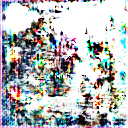

In [54]:
imgs = transform(fake[0].data)
imgs

### val sample

### test sample

In [28]:
%%time
config = ges_Aonfig('configs/config-real.yaml')['PARSEMETA']
parser = EcommerceDataParser(config, use=True)

[INFO    ] 2019-02-19 01:11:00 [parse_metadata.py] [load_spm:41] USE MODE LOAD SPM
[INFO    ] 2019-02-19 01:11:00 [parse_metadata.py] [load_spm:48] USE MODE LOAD SPM DONE: 0 sec
[INFO    ] 2019-02-19 01:11:00 [parse_metadata.py] [load_doc2vec_model:231] USE MODE LOAD DOC2VEC
[INFO    ] 2019-02-19 01:11:00 [parse_metadata.py] [get_doc_list:205] the crucible performed by stuart pankin jerome dempsey cast
 ['▁the', '▁crucible', '▁performed', '▁by', '▁stuart', '▁pank', 'in', '▁jerome', '▁dempsey', '▁cast'] [1, 22024, 42951, 25, 9213, 37543, 253, 19846, 35471, 997] 0 sec
[INFO    ] 2019-02-19 01:11:01 [parse_metadata.py] [get_doc_list:205] turbulent mirror an illustrated guide to chaos theory and the science of wholeness
 ['▁turbulent', '▁mirror', '▁an', '▁illustrated', '▁guide', '▁to', '▁chaos', '▁theory', '▁and', '▁the', '▁science', '▁of', '▁wholeness'] [20458, 623, 110, 1231, 53, 17, 4989, 1188, 5, 1, 523, 4, 17516] 1 sec
[INFO    ] 2019-02-19 01:11:03 [parse_metadata.py] [get_doc_list:2

[INFO    ] 2019-02-19 01:12:01 [parse_metadata.py] [get_doc_list:205] wolverine back in japan
 ['▁wolverine', '▁back', '▁in', '▁japan'] [5119, 214, 14, 1797] 2 sec
[INFO    ] 2019-02-19 01:12:03 [parse_metadata.py] [get_doc_list:205] favorite bible stories
 ['▁favorite', '▁bible', '▁stories'] [2214, 440, 375] 1 sec
[INFO    ] 2019-02-19 01:12:05 [parse_metadata.py] [get_doc_list:205] essential cinema on the necessity of film canons
 ['▁essential', '▁cinema', '▁on', '▁the', '▁necessity', '▁of', '▁film', '▁can', 'ons'] [709, 5214, 30, 1, 32635, 4, 593, 333, 2704] 1 sec
[INFO    ] 2019-02-19 01:12:07 [parse_metadata.py] [get_doc_list:205] spiritual warfare and missions the battle for god 146 s glory among the nations
 ['▁spiritual', '▁warfare', '▁and', '▁missions', '▁the', '▁battle', '▁for', '▁god', '▁146', '▁s', '▁glory', '▁among', '▁the', '▁nations'] [1512, 5793, 5, 13573, 1, 1352, 6, 359, 6321, 38, 3285, 4927, 1, 6627] 2 sec
[INFO    ] 2019-02-19 01:12:09 [parse_metadata.py] [get_doc_l

[INFO    ] 2019-02-19 01:13:04 [parse_metadata.py] [get_doc_list:205] the best ever book of bulgarian jokes lots and lots of jokes specially repurposed for you know who
 ['▁the', '▁best', '▁ever', '▁book', '▁of', '▁bulgarian', '▁jokes', '▁lots', '▁and', '▁lots', '▁of', '▁jokes', '▁specially', '▁rep', 'ur', 'pos', 'ed', '▁for', '▁you', '▁know', '▁who'] [1, 235, 1416, 51, 4, 27800, 10589, 10427, 5, 10427, 4, 10589, 17671, 6772, 1889, 14995, 382, 6, 122, 1025, 529] 2 sec
[INFO    ] 2019-02-19 01:13:06 [parse_metadata.py] [get_doc_list:205] reveolution the return of the divine feminine
 ['▁reve', 'olution', '▁the', '▁return', '▁of', '▁the', '▁divine', '▁feminine'] [33592, 14607, 1, 2162, 4, 1, 3283, 10161] 2 sec
[INFO    ] 2019-02-19 01:13:09 [parse_metadata.py] [get_doc_list:205] the sweetest game the game series volume 3
 ['▁the', '▁sweetest', '▁game', '▁the', '▁game', '▁series', '▁volume', '▁3'] [1, 24066, 360, 1, 360, 43, 155, 13] 2 sec
[INFO    ] 2019-02-19 01:13:11 [parse_metadata.py

[INFO    ] 2019-02-19 01:14:08 [parse_metadata.py] [get_doc_list:205] beethoven the complete violin sonatas
 ['▁beethoven', '▁the', '▁complete', '▁violin', '▁sonatas'] [4788, 1, 225, 1873, 4953] 2 sec
[INFO    ] 2019-02-19 01:14:09 [parse_metadata.py] [get_doc_list:205] exitos recuerdos
 ['▁exitos', '▁recuer', 'dos'] [10029, 37635, 32830] 0 sec
[INFO    ] 2019-02-19 01:14:10 [parse_metadata.py] [get_doc_list:205] live at the fillmore auditorium
 ['▁live', '▁at', '▁the', '▁fillmore', '▁auditorium'] [506, 202, 1, 26918, 41323] 1 sec
[INFO    ] 2019-02-19 01:14:11 [parse_metadata.py] [get_doc_list:205] tapestry song of songs come into my garden
 ['▁tapestry', '▁song', '▁of', '▁songs', '▁come', '▁into', '▁my', '▁garden'] [6039, 1815, 4, 992, 2314, 999, 129, 498] 1 sec
[INFO    ] 2019-02-19 01:14:12 [parse_metadata.py] [get_doc_list:205] pretty pink rose ep
 ['▁pretty', '▁pink', '▁rose', '▁ep'] [2728, 56, 423, 2754] 0 sec
[INFO    ] 2019-02-19 01:14:13 [parse_metadata.py] [get_doc_list:205]

[INFO    ] 2019-02-19 01:15:12 [parse_metadata.py] [get_doc_list:205] cybrtrayd b018 baby bottle lolly chocolate candy mold with exclusive cybrtrayd copyrighted chocolate molding instructions
 ['▁cybrtrayd', '▁b', '018', '▁baby', '▁bottle', '▁lolly', '▁chocolate', '▁candy', '▁mold', '▁with', '▁exclusive', '▁cybrtrayd', '▁copyrighted', '▁chocolate', '▁molding', '▁instructions'] [7961, 149, 16440, 104, 329, 17340, 337, 826, 2438, 9, 1610, 7961, 14689, 337, 6448, 4670] 2 sec
[INFO    ] 2019-02-19 01:15:15 [parse_metadata.py] [get_doc_list:205] labtron palm aneroid sphygmomanometer adult grey
 ['▁lab', 'tron', '▁palm', '▁aneroid', '▁sphygmoman', 'ometer', '▁adult', '▁grey'] [2227, 20784, 1609, 31271, 27279, 11373, 400, 254] 2 sec
[INFO    ] 2019-02-19 01:15:17 [parse_metadata.py] [get_doc_list:205] tranquility atn all through the night fitted briefs size extra large xl case of 60 5 bags of 12
 ['▁tranquility', '▁atn', '▁all', '▁through', '▁the', '▁night', '▁fitted', '▁briefs', '▁size', '▁e

[INFO    ] 2019-02-19 01:16:14 [parse_metadata.py] [get_doc_list:205] international arrivals helena filex standard file folders 122 17
 ['▁international', '▁arrivals', '▁helena', '▁file', 'x', '▁standard', '▁file', '▁folders', '▁122', '▁17'] [541, 21309, 18785, 2012, 37, 365, 2012, 9999, 9769, 255] 2 sec
[INFO    ] 2019-02-19 01:16:16 [parse_metadata.py] [get_doc_list:205] evga 8600gt 256mb 540mhz nvidia geforce pci express x16 video card with sli dvi
 ['▁evga', '▁8600', 'gt', '▁256', 'mb', '▁540', 'mhz', '▁nvidia', '▁geforce', '▁pci', '▁express', '▁x', '16', '▁video', '▁card', '▁with', '▁sli', '▁dvi'] [14533, 13630, 7501, 4242, 1386, 5345, 2887, 7871, 5255, 2450, 1656, 27, 563, 479, 209, 9, 10868, 3061] 2 sec
[INFO    ] 2019-02-19 01:16:19 [parse_metadata.py] [get_doc_list:205] schott zwiesel tritan crystal glass pure collection 3 4 liter carafe decanter
 ['▁schott', '▁zwiesel', '▁tritan', '▁crystal', '▁glass', '▁pure', '▁collection', '▁3', '▁4', '▁liter', '▁carafe', '▁decanter'] [261

[INFO    ] 2019-02-19 01:17:20 [parse_metadata.py] [get_doc_list:205] ncaa florida gators 9 gator head reflective decal
 ['▁ncaa', '▁florida', '▁gators', '▁9', '▁gator', '▁head', '▁reflective', '▁decal'] [461, 1950, 6700, 57, 5982, 379, 3185, 422] 2 sec
[INFO    ] 2019-02-19 01:17:23 [parse_metadata.py] [get_doc_list:205] hot wheels 1 18 ferrari 612 scaglietti die cast red
 ['▁hot', '▁wheels', '▁1', '▁18', '▁ferrari', '▁612', '▁scag', 'li', 'etti', '▁die', '▁cast', '▁red'] [229, 1246, 11, 79, 7508, 16700, 40073, 7812, 11469, 858, 997, 41] 3 sec
[INFO    ] 2019-02-19 01:17:25 [parse_metadata.py] [get_doc_list:205] birkenstock women's boston clog lapis 37 n eu
 ['▁birkenstock', '▁women', "'", 's', '▁boston', '▁clog', '▁lapis', '▁37', '▁n', '▁eu'] [7477, 16, 3, 2, 1480, 1901, 9104, 1160, 143, 755] 2 sec
[INFO    ] 2019-02-19 01:17:31 [parse_metadata.py] [get_doc_list:205] isotoner satin pearl ballerina girls slippers
 ['▁isotoner', '▁satin', '▁pearl', '▁ballerina', '▁girls', '▁slippers'] 

[INFO    ] 2019-02-19 01:18:35 [parse_metadata.py] [get_doc_list:205] maison chic bear lux fur 12 resting toy
 ['▁maison', '▁chic', '▁bear', '▁lux', '▁fur', '▁12', '▁resting', '▁toy'] [14544, 2426, 732, 5482, 1690, 29, 34971, 377] 2 sec
[INFO    ] 2019-02-19 01:18:37 [parse_metadata.py] [get_doc_list:205] replacement electronic ignition coil solid state module for tecumseh 35135 35135a
 ['▁replacement', '▁electronic', '▁ignition', '▁coil', '▁solid', '▁state', '▁module', '▁for', '▁tecumseh', '▁35', '135', '▁35', '135', 'a'] [89, 1392, 4101, 2746, 283, 602, 2999, 6, 16400, 543, 3717, 543, 3717, 76] 2 sec
[INFO    ] 2019-02-19 01:18:39 [parse_metadata.py] [get_doc_list:205] umarex r10 match light 7 0 gram per 500 177
 ['▁umarex', '▁r', '10', '▁match', '▁light', '▁7', '▁0', '▁gram', '▁per', '▁500', '▁177'] [31302, 144, 241, 3375, 59, 32, 50, 2673, 476, 390, 8504] 2 sec
[INFO    ] 2019-02-19 01:18:42 [parse_metadata.py] [get_doc_list:205] legends dangerous curves tin sign 16 x 12 5 12x16
 [

[INFO    ] 2019-02-19 01:19:54 [parse_metadata.py] [get_doc_list:205] windex electronics value pack
 ['▁wind', 'ex', '▁electronics', '▁value', '▁pack'] [1306, 2703, 2365, 1317, 18] 2 sec
[INFO    ] 2019-02-19 01:19:57 [parse_metadata.py] [get_doc_list:205] bif bang pow lost series 1 action figure ben linus
 ['▁bif', '▁bang', '▁pow', '▁lost', '▁series', '▁1', '▁action', '▁figure', '▁ben', '▁linus'] [23152, 5494, 8001, 1175, 43, 11, 442, 376, 2642, 33481] 3 sec
[INFO    ] 2019-02-19 01:19:59 [parse_metadata.py] [get_doc_list:205] ultra pro clear gamers stackable 2 piece slide in deck box
 ['▁ultra', '▁pro', '▁clear', '▁gamers', '▁stackable', '▁2', '▁piece', '▁slide', '▁in', '▁deck', '▁box'] [268, 118, 130, 37990, 5471, 7, 86, 1157, 14, 1449, 126] 2 sec
[INFO    ] 2019-02-19 01:20:02 [parse_metadata.py] [get_doc_list:205] easy street women's lunar ii open toe pump
 ['▁easy', '▁street', '▁women', "'", 's', '▁lunar', '▁ii', '▁open', '▁toe', '▁pump'] [374, 603, 16, 3, 2, 9036, 172, 634, 648,

[INFO    ] 2019-02-19 01:21:14 [parse_metadata.py] [get_doc_list:205] lsarts halloween wine bottle stopper bat
 ['▁ls', 'arts', '▁halloween', '▁wine', '▁bottle', '▁stopper', '▁bat'] [1739, 14307, 1876, 900, 329, 4369, 2204] 3 sec
[INFO    ] 2019-02-19 01:21:16 [parse_metadata.py] [get_doc_list:205] bestdealusa black touch screen remote control tv dvd wrist watch
 ['▁bestdealusa', '▁black', '▁touch', '▁screen', '▁remote', '▁control', '▁tv', '▁dvd', '▁wrist', '▁watch'] [4171, 10, 213, 106, 564, 385, 557, 306, 1489, 82] 2 sec
[INFO    ] 2019-02-19 01:21:19 [parse_metadata.py] [get_doc_list:205] de rosa peony flower tambourine 32 jingles red free directlycheap tm translucent blue medium pick
 ['▁de', '▁rosa', '▁peony', '▁flower', '▁tambourine', '▁32', '▁jingles', '▁red', '▁free', '▁directlycheap', '▁tm', '▁translucent', '▁blue', '▁medium', '▁pick'] [162, 10489, 11032, 314, 19044, 237, 28867, 41, 112, 39386, 845, 4077, 33, 96, 2496] 3 sec
[INFO    ] 2019-02-19 01:21:22 [parse_metadata.py] [

[INFO    ] 2019-02-19 01:22:11 [parse_metadata.py] [get_doc_list:205] pebeo fantasy moon discovery set
 ['▁pebeo', '▁fantasy', '▁moon', '▁discovery', '▁set'] [25949, 1813, 824, 2944, 24] 2 sec
[INFO    ] 2019-02-19 01:22:14 [parse_metadata.py] [get_doc_list:205] barbie my size puzzle xl 46 pieces
 ['▁barbie', '▁my', '▁size', '▁puzzle', '▁xl', '▁46', '▁pieces'] [1689, 129, 40, 822, 619, 1601, 820] 3 sec
[INFO    ] 2019-02-19 01:22:18 [parse_metadata.py] [get_doc_list:205] pack of 25 11x14 white picture mats mattes with white core bevel cut for 8x10 photo backing bags
 ['▁pack', '▁of', '▁25', '▁11', 'x', '14', '▁white', '▁picture', '▁mats', '▁matt', 'es', '▁with', '▁white', '▁core', '▁bevel', '▁cut', '▁for', '▁8', 'x', '10', '▁photo', '▁backing', '▁bags'] [18, 4, 135, 90, 37, 622, 26, 1071, 2460, 6105, 579, 9, 26, 773, 13877, 364, 6, 22, 37, 241, 769, 7427, 485] 3 sec
[INFO    ] 2019-02-19 01:22:20 [parse_metadata.py] [get_doc_list:205] notebook 10 1 2 x 8 in
 ['▁notebook', '▁10', '▁1', 

[INFO    ] 2019-02-19 01:23:26 [parse_metadata.py] [get_doc_list:205] 2 pcs touch cell phone screen pen stylus for nokia 5800
 ['▁2', '▁pcs', '▁touch', '▁cell', '▁phone', '▁screen', '▁pen', '▁stylus', '▁for', '▁nokia', '▁5800'] [7, 926, 213, 281, 171, 106, 347, 637, 6, 1236, 15737] 2 sec
[INFO    ] 2019-02-19 01:23:29 [parse_metadata.py] [get_doc_list:205] fonus bluetooth wireless stereo headset w microphone noise cancellation handsfree over the head style headphone for samsung galaxy s2 captivate i897 double time nexus s 4g repp brightside admire red galaxy appeal character rugby smart
 ['▁fonus', '▁bluetooth', '▁wireless', '▁stereo', '▁headset', '▁w', '▁microphone', '▁noise', '▁cancellation', '▁handsfree', '▁over', '▁the', '▁head', '▁style', '▁headphone', '▁for', '▁samsung', '▁galaxy', '▁s', '2', '▁captivate', '▁i', '897', '▁double', '▁time', '▁nexus', '▁s', '▁4', 'g', '▁repp', '▁brightside', '▁admire', '▁red', '▁galaxy', '▁appeal', '▁character', '▁rugby', '▁smart'] [16897, 911, 361,

[INFO    ] 2019-02-19 01:24:36 [parse_metadata.py] [get_doc_list:205] amico jeep wrangler 30 diameter soft spare wheel tyre tire cover white black
 ['▁amico', '▁jeep', '▁wrangler', '▁30', '▁diameter', '▁soft', '▁spare', '▁wheel', '▁tyre', '▁tire', '▁cover', '▁white', '▁black'] [13287, 2108, 3228, 142, 1078, 182, 4592, 596, 19650, 963, 34, 26, 10] 3 sec
[INFO    ] 2019-02-19 01:24:39 [parse_metadata.py] [get_doc_list:205] perrin license plate relocation kit 2013 brz fr s
 ['▁perrin', '▁license', '▁plate', '▁relocation', '▁kit', '▁2013', '▁brz', '▁fr', '▁s'] [41118, 1282, 444, 25822, 54, 667, 27620, 2803, 38] 3 sec
[INFO    ] 2019-02-19 01:24:42 [parse_metadata.py] [get_doc_list:205] new release limited time offer uppercase soft touch hard shell case for macbook air 13 3 red
 ['▁new', '▁release', '▁limited', '▁time', '▁offer', '▁uppercase', '▁soft', '▁touch', '▁hard', '▁shell', '▁case', '▁for', '▁macbook', '▁air', '▁13', '▁3', '▁red'] [35, 1807, 1279, 261, 14369, 28692, 182, 213, 71, 571

In [42]:
print(parser.text2wp('the serious observer s baseball scorebook'))

[1, 9853, 25286, 38, 892, 4047, 4504]


In [67]:
index = 4
noise = Variable(torch.randn(1, n_z))
noise.data.normal_(0,1)
caption = parser.text2vec('chao thai brand coconut cream powder 13 oz box').reshape(1,-1)
caption = torch.from_numpy(caption)
fake = netG(noise, caption)

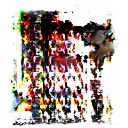

In [68]:
imgs = transform(fake[0].data)
imgs